In [ ]:
!rm -rf tilemap/
!git clone https://github.com/robinkct/tilemap

Cloning into 'tilemap'...
remote: Enumerating objects: 237, done.
remote: Counting objects: 100% (237/237), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 237 (delta 139), reused 221 (delta 126), pack-reused 0 (from 0)
Receiving objects: 100% (237/237), 51.27 KiB | 1.90 MiB/s, done.
Resolving deltas: 100% (139/139), done.
/content


In [ ]:
cd tilemap

/content/tilemap


In [ ]:
# save your api_key as file
!echo -n 'YOUR_API_KEY' > api_key

In [5]:
from main import chatgpt_do_msg

allow_gpt = False  # only used demo output
launch_api = False # show plan without do action
chatgpt_do_msg("", allow_gpt=allow_gpt, launch_api=launch_api)

***** Start *****
gpt reply (allow_gpt=False) (launch_api=False): 
ADDCARD: 人們在「解決問題」時展現的原創性遠超過在「選擇問題」時
ADDCARD: 選擇問題時，即便是聰明的人也可能顯得保守
ADDCARD: 解決時髦問題通常吸引不追隨潮流的人
ADDCARD: 選擇問題的賭注高，可能花費數年時間，而解決問題可能只需幾天

LOG: Run time: 0.0008025169372558594s


In [6]:
chatgpt_do_msg("幫我把每張卡片都建立連結", allow_gpt=True, launch_api=True)

***** Start *****
Allow GPT
AFTER Create
gpt reply (allow_gpt=True) (launch_api=True): 
Action: GetAllCardInfo
Action: GetAllConnectionInfo
Action: ADDCONNECTION

Unknown action: Action
Unknown action: Action
Unknown action: Action
LOG: Run time: 0.9018445014953613s


In [7]:
# install requirement
!pip install flask-ngrok2
!pip install pyngrok

# # register ngrok_auth_token from: https://dashboard.ngrok.com/get-started/setup
ngrok_auth_token = "YOUR_NGROK_API"

In [11]:
from flask_ngrok2 import run_with_ngrok
from flask import request, Flask
import json

app = Flask(__name__)
run_with_ngrok(app=app, auth_token=ngrok_auth_token)

# set methods=['GET','POST'] to prevent 'HTTP 405 Method Not Allowed'
@app.route("/", methods=['GET','POST'])
def home():
  return "Hello World"

@app.route("/chatgpt_do_msg", methods=['GET','POST'])
def test(): # repeat same input
  input = json.loads(request.data)['text']
  chatgpt_do_msg(input, allow_gpt=True, launch_api=True)

  # TODO: return error msg
  return "Success"
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://04ee-35-225-149-20.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040
***** Start *****
Allow GPT


INFO:werkzeug:127.0.0.1 - - [05/Jan/2025 15:58:13] "POST /chatgpt_do_msg HTTP/1.1" 200 -


AFTER Create
gpt reply (allow_gpt=True) (launch_api=True): 
Action: ADDCARD: 人們在「解決問題」時的原創性遠超過在「選擇問題」時  
Action: ADDCARD: 選擇工作內容時即便是最聰明的人也可能表現保守  
Action: ADDCARD: 生活中不追隨潮流的人會被時髦的問題吸引而去解決  
Action: ADDCARD: 選擇問題的風險比探索其解決方案大，因為可能花費數年时间

Unknown action: Action
Unknown action: Action
Unknown action: Action
Unknown action: Action
LOG: Run time: 4.903068780899048s


# 注意: 下方的程式為 Client，無法在此 colab 上運行  
（因 ngrok-free server 起來後持續監聽無法運行其他 cell）

In [12]:
##################################################
##  注意，此處程式為 Client 需在他處(ex:local)執行   ##
##################################################
import requests
import json

ngrok_app = "http://04ee-35-225-149-20.ngrok-free.app" # 更新 XXX.ngrok-free.app

transfer_text = """【流行】
  人們在「解決問題」時展現的原創性遠超過在「選擇問題」時。就算是最聰明的人，選擇工作內容時也可能令人驚訝的保守。一些生活中不追隨潮流的人，會忍不住去解決時髦的問題。
  人們選擇問題較保守，原因之一是選問題的賭注較大。一個問題可能花費你數年，而探索其解決方案可能只需要幾天。
  """

# url = ngrok_app + '/'
url = ngrok_app + '/chatgpt_do_msg'

r = requests.post(
    url=url,
    json={"text": transfer_text},
)
r.encoding = "utf_8" # other encoding: utf_8 utf_16 gbk gb18030 big5hkscs
requests = r.text
print(requests)

Success


# 使用教學
1. Run all  
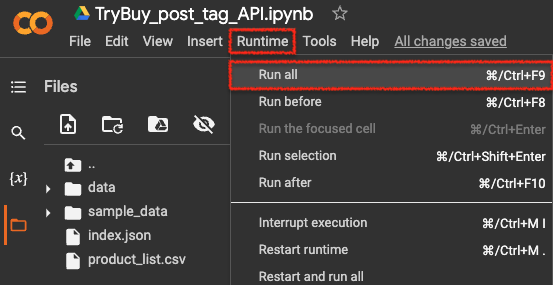

2. 將新產生的網址 "XXX.ngrok-free.app"，複製到下方 ngrok_app 中  
由於套用免費 server，每次重啟都會替換網址，若想付費升級：可參考 [ngrok](https://dashboard.ngrok.com/get-started/your-authtoken)
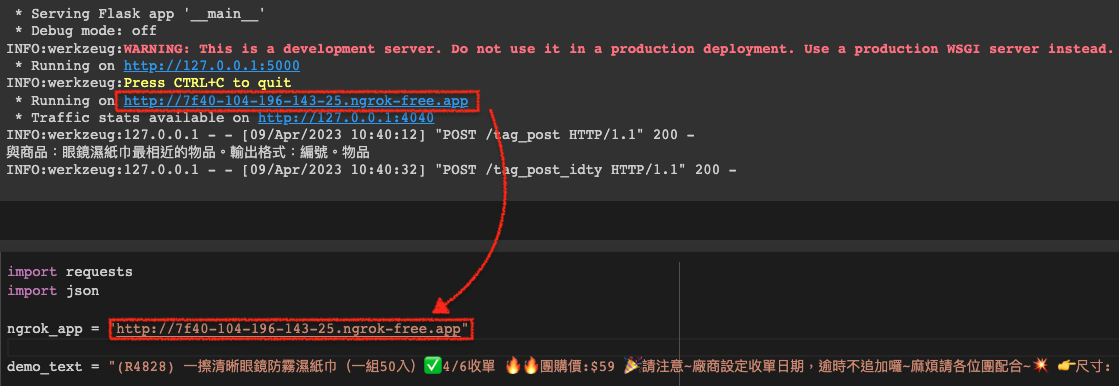

3. 透過 python 或其他 HTTP POST request 發送貼文、收貼標結果
  
4. 可依需求改變 http://XXX.ngrok-free.app<mark>`/參數`</mark>，達到不同效果
  - `/init` -- 重置 chatgpt 的 prompt，會因處理貼文數過多，導致格式跑掉。
  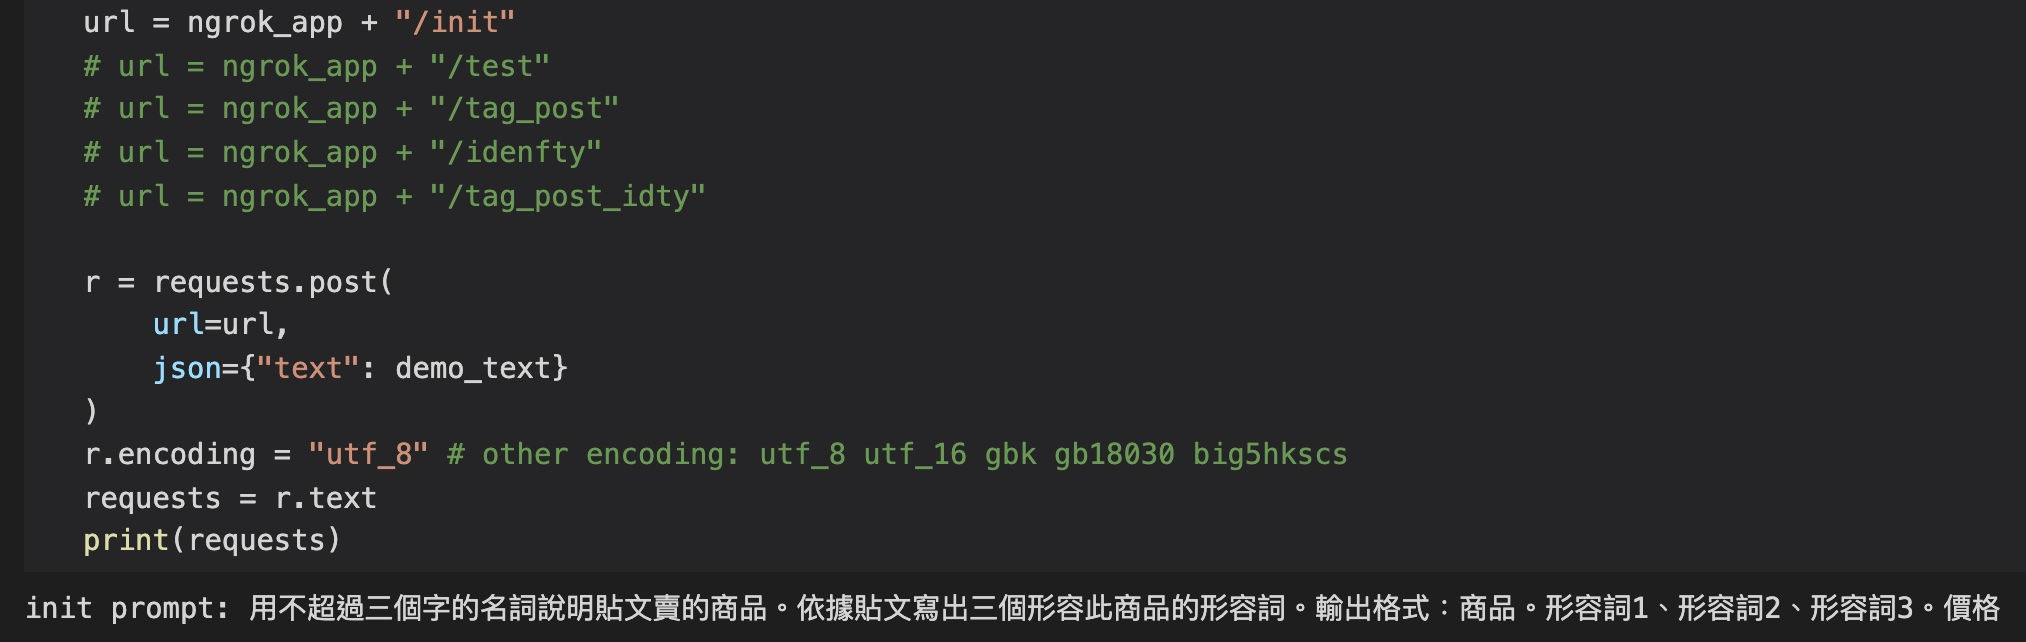
  - `/test` -- 輸入貼文，印出貼文
      - 輸出格式：貼文  
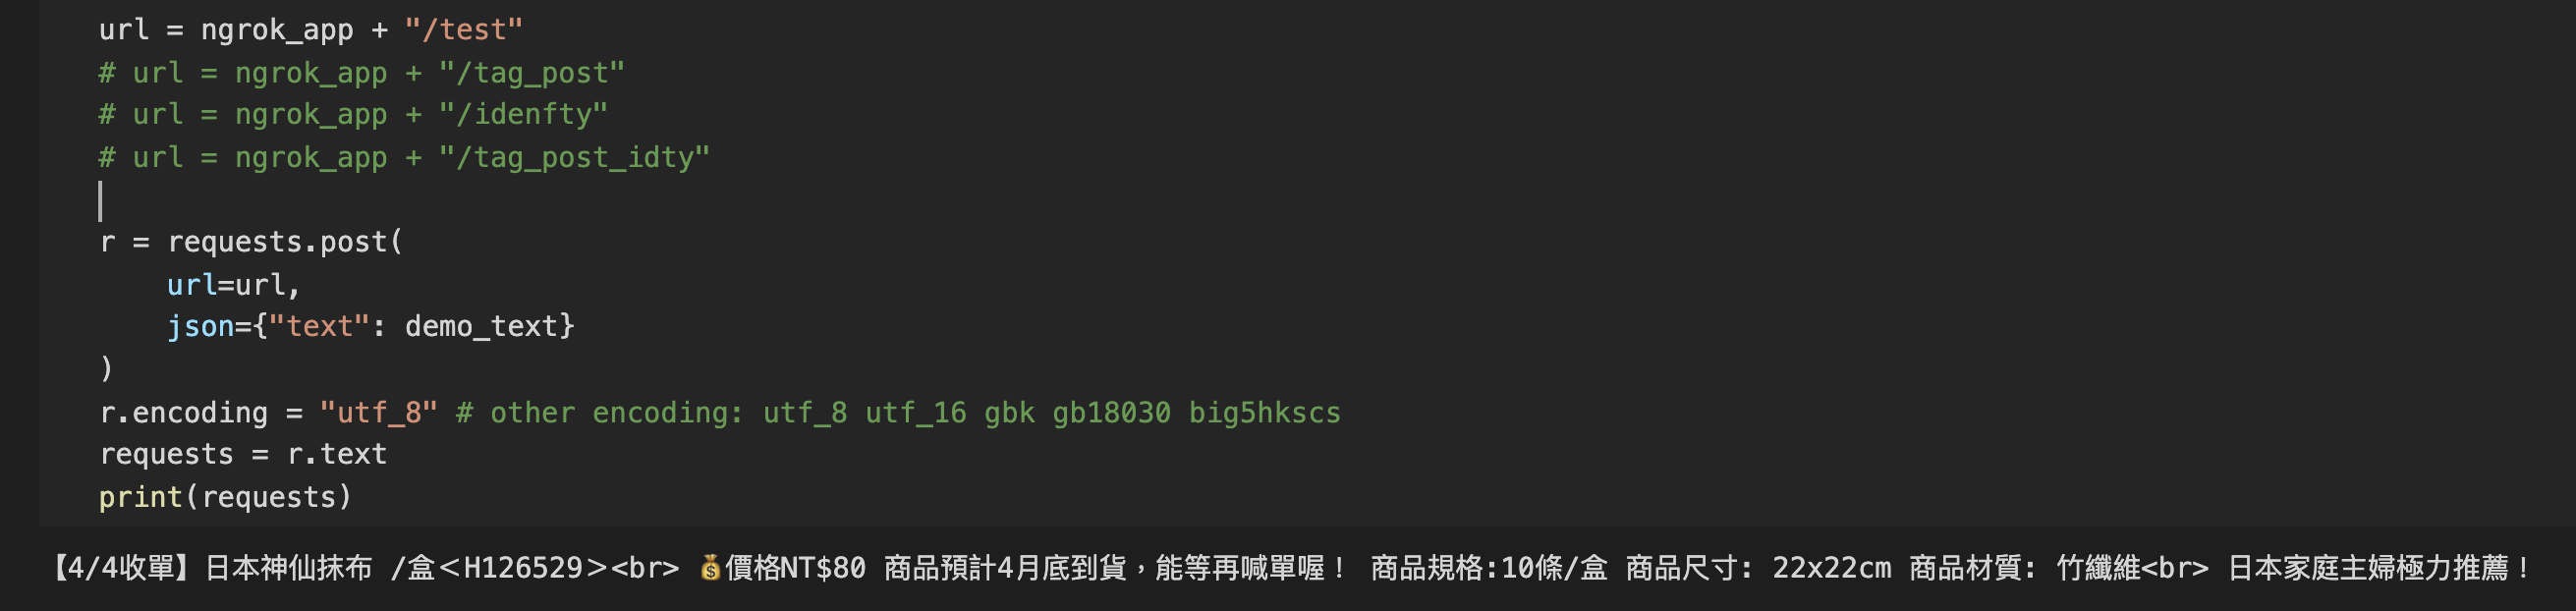
  - `/tag_post` -- 輸入貼文，對貼文進行貼標
      - 輸出格式：商品。形容詞1、形容詞2、形容詞3。價格  
      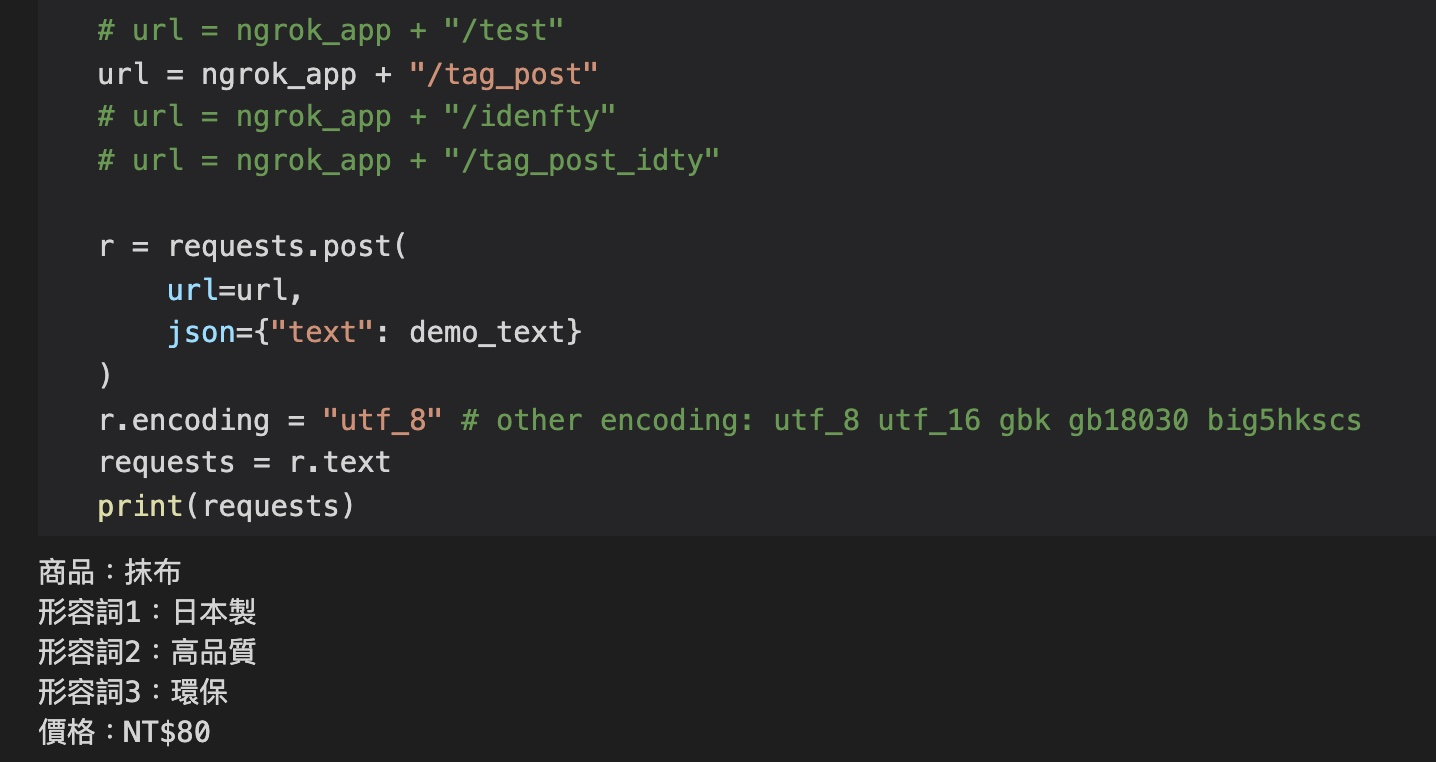
  - `/identity` -- 輸入「商品名稱」，到資料庫搜索「商品編號」
      - 輸出：商品編號  
      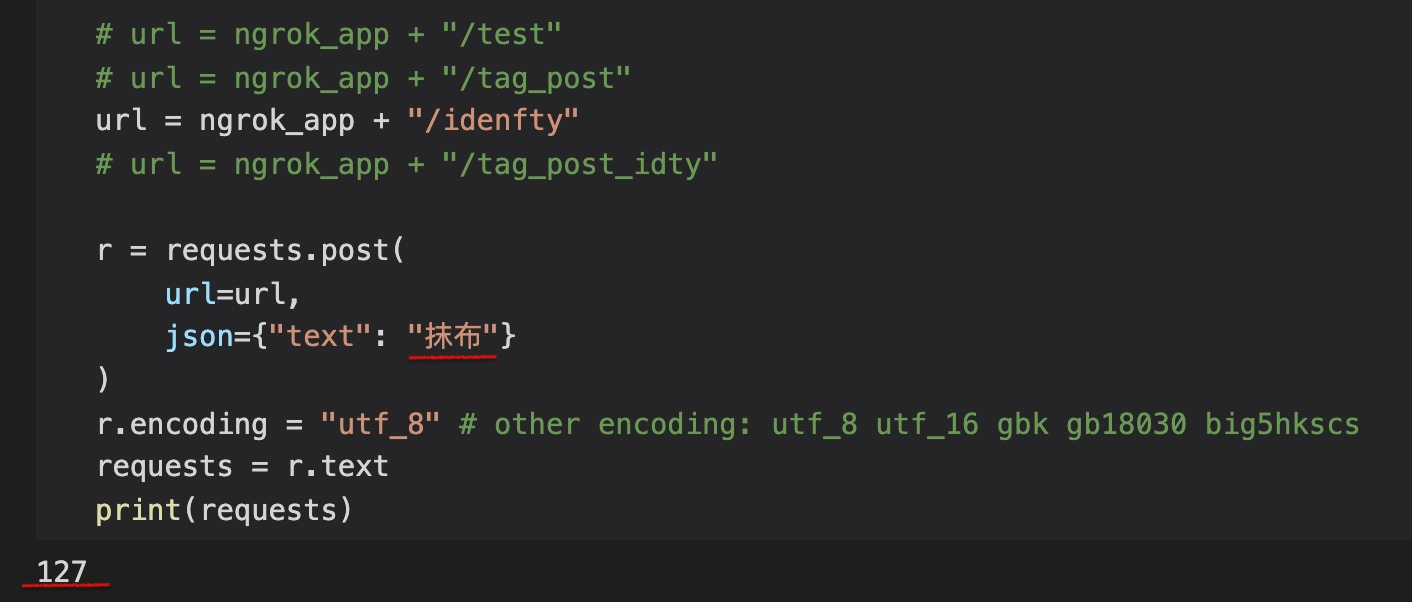
  - `/tag_post_idty` -- 輸入貼文的同時，到資料庫搜索「商品編號」 # TODO
      - 輸出格式：商品。**商品編號**。形容詞1、形容詞2、形容詞3。價格  
      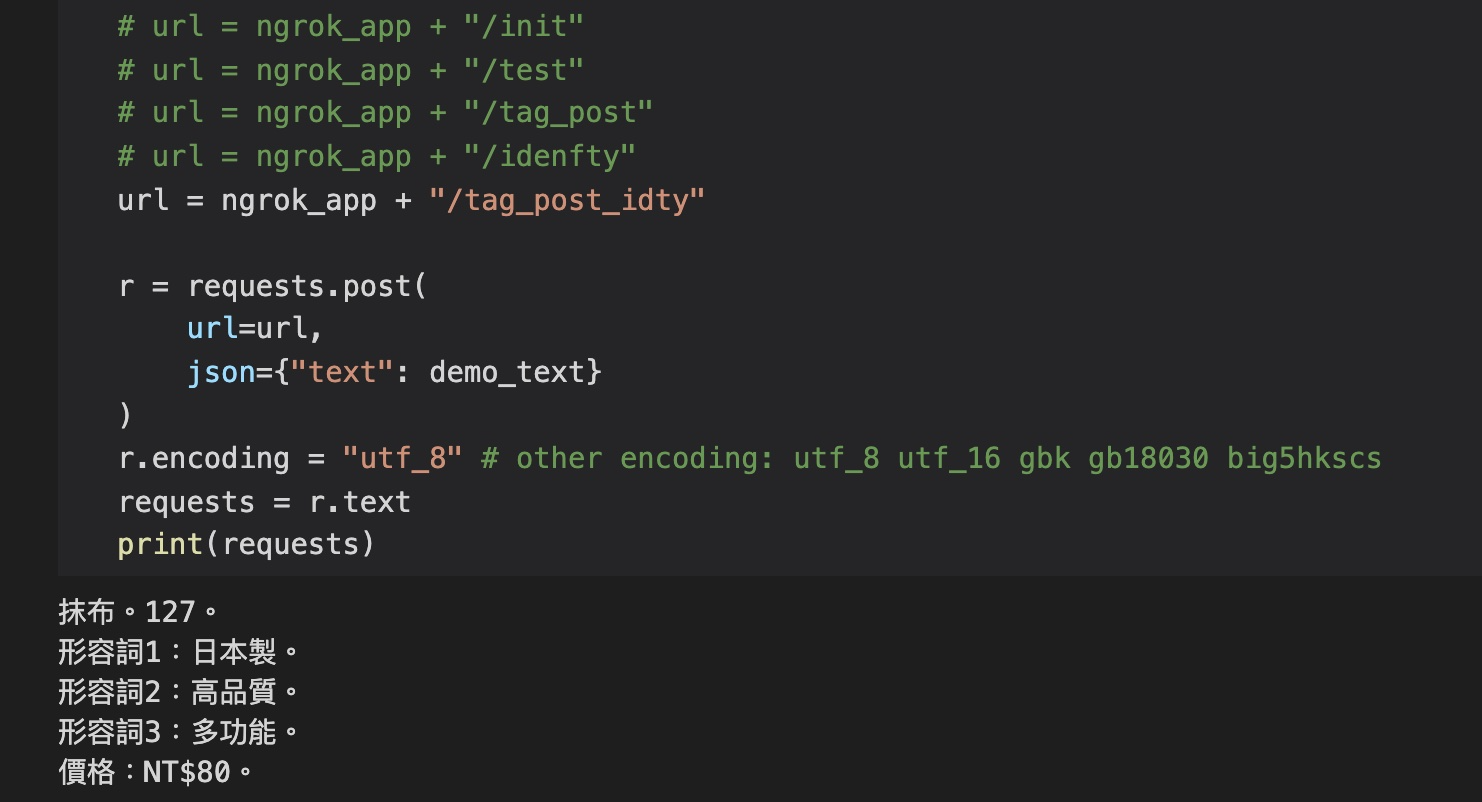

extra 問題排除：
- 出現 `<!DOCTYPE html>` 時，檢查 ngrok_app 是否更新？  
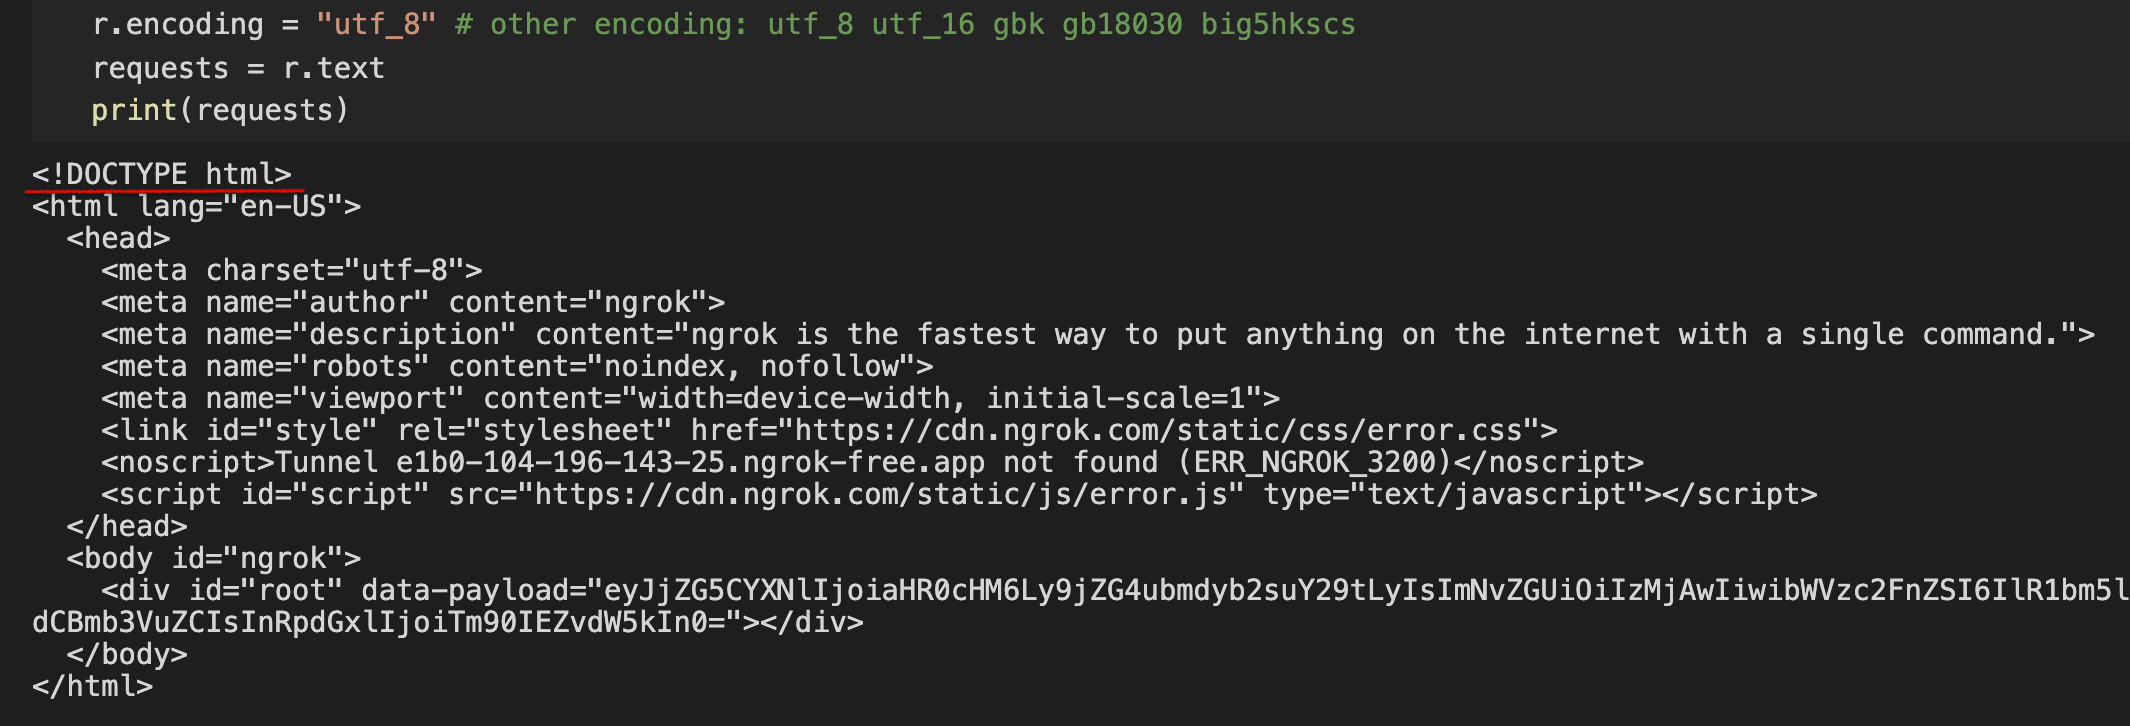

## Other debug links:
- OpenAI related:
  - [ChatGPT](https://github.com/acheong08/ChatGPT)
  - [OpenAI ChatGPT usage](https://platform.openai.com/account/usage)
  - [OpenAI API reference](https://platform.openai.com/docs/api-reference)
- Flask setup in colab
  - [Python Flask API in google colab](https://www.linkedin.com/pulse/how-make-simple-flask-api-from-scratch-google-colab-niranjan-jain/)
  - [Python Flask API in google colab - Youtube](https://www.youtube.com/watch?v=tlQsviAbBxk)
  - [flask-ngrok - PyPi](https://pypi.org/project/flask-ngrok/)
  - [ngrok: my Authtoken](https://dashboard.ngrok.com/get-started/your-authtoken)
- GPT search in index.json
  - [construct_index demo](https://www.fabrikod.com/create-your-own-chat-bot-with-gpt-index-and-lang-chain)  
  - [construct_index demo - Youtube](https://www.youtube.com/watch?v=Dhc_fq5iCnU)
  - [LlamaIndex offical page](https://gpt-index.readthedocs.io/en/latest/guides/primer/usage_pattern.html#customizing-llm-s)   
  - [Llama_index - Github](https://github.com/jerryjliu/llama_index)
  - debugs
    - [llama-index upgraded to 0.5.x](https://github.com/jerryjliu/llama_index/issues/1033)  
    - [A single term is larger than the allowed chunk size](https://github.com/jerryjliu/llama_index/issues/1031)  
    - [`load_from_dic` not found](https://github.com/jerryjliu/llama_index/issues/424)